In [76]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [77]:
def time_at_dist(x):
    return 0.2 * x

x_opt: 2.520687484769015, theta: -81.95215375268849, error: -3.9968028886505635e-14


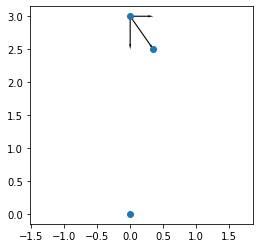

In [87]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis("equal")

R = 3
vx = -1
vz = 0.7

def objective(x):
    return (R + vx * time_at_dist(x))**2 + (vz * time_at_dist(x))**2 - x**2

x_opt = fsolve(objective, x0 = R)
x_opt = x_opt[0]
t = time_at_dist(x_opt)

theta = -np.arccos(vz * t / x_opt)
print(f"x_opt: {x_opt}, theta: {np.degrees(theta)}, error: {objective(x_opt)}")


robot = np.array([0, 0])
hub = np.array([0, R])
target = [x_opt*np.cos(-theta), x_opt*np.sin(-theta)]

robot_to_target = [robot, target]
hub_dx = [hub, t * np.array([0, vx])]
hub_dz = [hub, t * np.array([vz, 0])]
hub_moved = [hub, t * np.array([vz, vx])]

dots = np.array([target, robot, hub])
arrows = np.array([hub_dx, hub_dz, hub_moved])

plt.quiver(arrows[:,0,0], arrows[:,0,1], arrows[:,1,0], arrows[:,1,1],
        angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)
plt.scatter(dots[:, 0], dots[:, 1])
